In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import tensorflow as tf
import keras 
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from keras import backend as K
from keras.utils import plot_model
from keras.utils import multi_gpu_model
from sklearn.model_selection import StratifiedKFold
import cv2
from skimage import io

from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,roc_curve,auc

from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import random
import pandas as pd
from keras import losses
from skimage.io import imsave, imread

from keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.resnet152 import ResNet152

os.environ["CUDA_VISIBLE_DEVICES"] = "4,5"

/home/dgxadmin/anaconda3/envs/zzaem2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dgxadmin/anaconda3/envs/zzaem2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dgxadmin/anaconda3/envs/zzaem2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dgxadmin/anaconda3/envs/zzaem2/lib

In [2]:
pwd

'/home/dgxadmin/gcubme_ai/Workspace/JW_Seo/DVT_detection/Radiomics/code/deep_learning'

In [10]:
input_img = Input(shape=(32,32,1))
input_img.shape

TensorShape([Dimension(None), Dimension(32), Dimension(32), Dimension(1)])

In [11]:
model = keras.applications.VGG16(include_top=False, input_tensor=Input(shape=(32,32,1)), weights=None, input_shape=(32,32,1), pooling='max_pooling')

In [11]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

In [2]:
def vgg_app_16(inputs):
    
    input_x = keras.applications.VGG16(include_top=False, input_tensor=inputs, weights=None, input_shape=(32,32,1), pooling='max')
    x = input_x.outputs[0]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(x)
    

#     GAP_layer=GlobalAveragePooling2D()
#     out = GAP_layer(x) 
    x = Dense(256, activation="relu")(x)
    out = Dense(1, activation="sigmoid")(x)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model

# input_img = Input(shape=(32,32,1))
# model = vgg_app_16(input_img)
# model.summary()   

def vgg_app_19(inputs):
    
    input_x = keras.applications.VGG19(include_top=False, input_tensor=inputs, weights=None, input_shape=(32,32,1), pooling='max')
    x = input_x.outputs[0]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(x)
    

#     GAP_layer=GlobalAveragePooling2D()
#     out = GAP_layer(x)
    x = Dense(256, activation="relu")(x)
    out = Dense(1, activation="sigmoid")(x)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model

# def resnet_app_50(inputs):
    
#     resnet = keras_resnet.models.ResNet50(inputs, include_top=False, freeze_bn=False)
#     resout=resnet.outputs[3]
    
# #     flatten_layer = Flatten()  
# #     out = flatten_layer(resout)

#     GAP_layer=GlobalAveragePooling2D()
#     out = GAP_layer(resout)  
#     out = Dense(1, activation="sigmoid")(out)
    
    
#     model = Model(inputs=inputs, outputs=out)
    
#     return model
def resnet_app_50(inputs):
    
    input_x = keras.applications.resnet.ResNet50(include_top=False, input_tensor=inputs, weights=None, input_shape=(32,32,1), pooling='max')
    x=input_x.outputs[0]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(resout)

#     GAP_layer=GlobalAveragePooling2D()
#     out = GAP_layer(resout)  
    x = Dense(1024, activation="relu")(x)
    x = Dense(512, activation="relu")(x)
    out = Dense(1, activation="sigmoid")(x)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model
# input_img = Input(shape=(32,32,1))    
# model = resnet_app_50(input_img)
# model.summary()
def resnet_app_152(inputs):
    
    input_x = keras.applications.resnet.ResNet50(include_top=False, input_tensor=inputs, weights=None, input_shape=(32,32,1), pooling='max')
    x=input_x.outputs[0]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(resout)

#     GAP_layer=GlobalAveragePooling2D()
#     out = GAP_layer(resout)  
    x = Dense(1024, activation="relu")(x)
    x = Dense(512, activation="relu")(x)
    x = Dense(256, activation="relu")(x)
#     x = Dense(128, activation="relu")(x)
#     x = Dense(64, activation="relu")(x)
#     x = Dense(32, activation="relu")(x)
    out = Dense(1, activation="sigmoid")(x)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model
def resnet_app_34(inputs):
    
    resnet = keras_resnet.models.ResNet34(inputs, include_top=False, freeze_bn=False)
    resout=resnet.outputs[3]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(resout)

    GAP_layer=GlobalAveragePooling2D()
    out = GAP_layer(resout)  
    out = Dense(1, activation="sigmoid")(out)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model  

def resnet_app_18(inputs):
    
    resnet = keras_resnet.models.ResNet18(inputs, include_top=False, freeze_bn=False)
    resout=resnet.outputs[3]
    
#     flatten_layer = Flatten()  
#     out = flatten_layer(resout)

    GAP_layer=GlobalAveragePooling2D()
    out = GAP_layer(resout)  
    out = Dense(1, activation="sigmoid")(out)
    
    
    model = Model(inputs=inputs, outputs=out)
    
    return model 

In [3]:
def calculate_performance(pred, test_y):
    tp=0
    fp=0
    tn=0
    fn=0
    alpha = 0.0001
    for cm in range(len(test_y)):
        if list(test_y)[cm]==0:
            if pred[cm]<0.5:
                tn+=1
            else:
                fn+=1
        else:
            if pred[cm]<0.5:
                fp+=1
            else:
                tp+=1
    print(tp, fp, tn, fn)
    sensitivity= (tp+alpha)/(tp+fn+alpha)
    specificity= (tn+alpha)/(tn+fp+alpha) 
    acc = (tp+tn+alpha)/(tp+fp+tn+fn+alpha)
    prec = (tp+alpha)/(tp+fp+alpha)

    return tp, fp, tn, fn, sensitivity, specificity, acc, prec

(1624, 32, 32, 1) (1624,)
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: 1299 TEST: 325
RETRAIN: 1300 RETEST: 324
(1300, 32, 32, 1) (324, 32, 32, 1)
163 1 0 973
TRAIN: 1299 TEST: 325
RETRAIN: 1300 RETEST: 324
(1300, 32, 32, 1) (324, 32, 32, 1)
0 164 163 1135
TRAIN: 1299 TEST: 325
RETRAIN: 1300 RETEST: 324
(1300, 32, 32, 1) (324, 32, 32, 1)
0 327 326 1298
TRAIN: 1299 TEST: 325
RETRAIN: 1300 RETEST: 324
(1300, 32, 32, 1) (324, 32, 32, 1)
0 489 488 1461
TRAIN: 1300 TEST: 324
RETRAIN: 1300 RETEST: 324
(1300, 32, 32, 1) (324, 32, 32, 1)
0 650 1461 1623


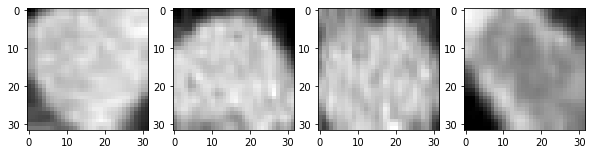

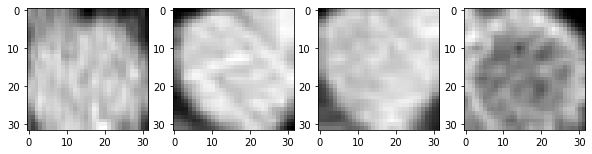

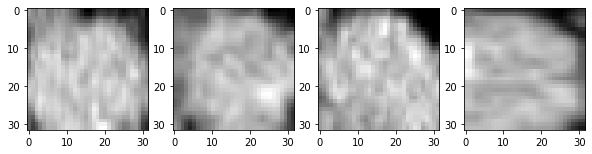

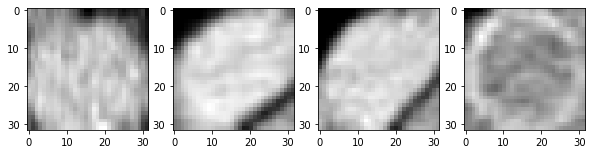

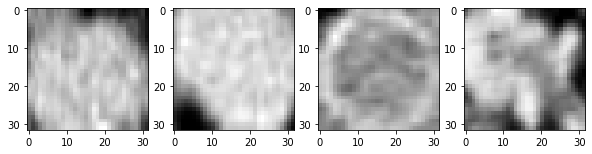

In [4]:
k=5

abnormal = np.load('../../data/npy/abnormal_16to32.npy')
normal = np.load('../../data/npy/normal_16to32.npy')
data_x = np.concatenate((normal, abnormal))
data_y = np.ndarray((len(data_x)),dtype=np.float32)
for n in range(len(data_x)):
    if n < len(normal):
        data_y[n] = 0
    else:
        data_y[n] = 1
print(data_x.shape, data_y.shape)        
# train_x,train_x,test_y,test_y = train_test_split(data_x,data_y, stratify = data_y, train_size=1300, random_state = 25)

skf = StratifiedKFold(n_splits=k)
skf.get_n_splits(data_x,data_y)
print(skf)
i=0
for train_index, test_index in skf.split(data_x,data_y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    indexs = np.concatenate((train_index, test_index), axis= 0)
    train_index = indexs[:1300]
    test_index = indexs[1300:]
    print("RETRAIN:", len(train_index), "RETEST:", len(test_index))
    train_x, test_x = data_x[train_index], data_x[test_index]
    train_y, test_y = data_y[train_index], data_y[test_index]
    print(train_x.shape, test_x.shape)
    plt.figure(figsize=(10,10))
    print(train_index[0],test_index[0],train_index[len(train_index)-1],test_index[len(test_index)-1])
    plt.subplot(1,4,1)
    plt.imshow(train_x[0], cmap='gray')
    plt.subplot(1,4,2)
    plt.imshow(test_x[0], cmap='gray')
    plt.subplot(1,4,3)
    plt.imshow(train_x[len(train_x)-1], cmap='gray')
    plt.subplot(1,4,4)
    plt.imshow(test_x[len(test_x)-1], cmap='gray')
 

In [5]:
input_img = Input(shape=(32,32,1))
model = vgg_app_16(input_img)
model.summary()  


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

In [6]:
savepath='./210518_vgg16_app_max_dense2_0001'
model_type='vgg16_app'
date='0518'
os.makedirs(savepath+'/npy', exist_ok=True)
os.makedirs(savepath+'/result', exist_ok=True)
os.makedirs(savepath+'/model', exist_ok=True)
i=0
performances = np.ndarray((k,4), dtype=np.float32)

for train_index, test_index in skf.split(data_x,data_y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
#     indexs = np.concatenate((train_index, test_index), axis= 0)
#     train_index = indexs[:1300]
#     test_index = indexs[1300:]
#     print("RETRAIN:", len(train_index), "RETEST:", len(test_index))
    dtrain_x, test_x = data_x[train_index], data_x[test_index]
    dtrain_y, test_y = data_y[train_index], data_y[test_index]
    
    np.save(savepath+'/npy/test_x_fold{}.npy'.format(str(i)), test_x)
    np.save(savepath+'/npy/test_y_fold{}.npy'.format(str(i)), test_y)
    np.save(savepath+'/npy/train_x_fold{}.npy'.format(str(i)), train_x)
    np.save(savepath+'/npy/train_y_fold{}.npy'.format(str(i)), train_y)
    
    train_x,val_x,train_y,val_y = train_test_split(dtrain_x,dtrain_y, stratify = dtrain_y, train_size=1040)

    input_img = Input(shape=(32,32,1))
#     model = keras.applications.resnet.ResNet50(include_top=True, weights=None, input_tensor=None, input_shape=(32,32,2), pooling=None, classes=2)
    model= vgg_app_16(input_img)
    model = multi_gpu_model(model, gpus=2)
    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    checkpointer = ModelCheckpoint(filepath=savepath+'/model/{}_fold{}_{}.h5'.format(model_type, str(i),date), verbose=1, save_best_only=True, monitor='val_loss')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                  patience=10, min_lr=0, min_delta=0.001, verbose=1)
    earlystopper = EarlyStopping(patience=30, verbose=1, monitor='val_loss')
    callbacks_list = [reduce_lr, checkpointer, earlystopper]
    
    results = model.fit(train_x, train_y, batch_size=128, epochs=500, verbose=1, validation_data=(val_x, val_y), shuffle=False, callbacks=callbacks_list)
    i+=1

TRAIN: 1299 TEST: 325
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1040 samples, validate on 259 samples
Epoch 1/500
1040/1040 [==============================] - 4s 4ms/step - loss: 0.6573 - accuracy: 0.6058 - val_loss: 0.5592 - val_accuracy: 0.6023

Epoch 00001: val_loss improved from inf to 0.55918, saving model to ./210518_vgg16_app_max_dense2_0001/model/vgg16_app_fold0_0518.h5
Epoch 2/500
1040/1040 [==============================] - 0s 285us/step - loss: 0.5288 - accuracy: 0.7087 - val_loss: 0.3158 - val_accuracy: 0.8880

Epoch 00002: val_loss improved from 0.55918 to 0.31577, saving model to ./210518_vgg16_app_max_dense2_0001/model/vgg16_app_fold0_0518.h5
Epoch 3/500
1040/1040 [==============================] - 0s 287us/step - loss: 0.2332 - accuracy: 0.9173 - val_loss: 0.2021 - val_accuracy: 0.9189

Epoch 00003: val_loss improved from 0.31577 to 0.20213, saving model to ./210518_vgg16_app_max_dense2_0001/model/vgg16_app_f

In [7]:
# check model and save result
i=0
performances = np.ndarray((k,4), dtype=np.float32)
for i in range(k):
    print(i)
    test_model = load_model(savepath+'/model/{}_fold{}_{}.h5'.format(model_type,str(i),date))
    test_x= np.load(savepath+'/npy/test_x_fold{}.npy'.format(str(i)))
    test_y= np.load(savepath+'/npy/test_y_fold{}.npy'.format(str(i)))
    test_result= test_model.predict(test_x, batch_size=128, verbose=1)
    np.save(savepath+'/npy/test_result_fold{}.npy'.format(str(i)), test_result)
    fpr_res,tpr_res,_=roc_curve(test_y,test_result)
    auc_res=auc(fpr_res, tpr_res)
    #     print("loss: %.2f, 정확도: %.3f  " %(score[0], score[1]))
    res_tp, res_fp, res_tn, res_fn, res_sensitivity, res_specificity, acc, prec= calculate_performance(test_result, test_y)
    
    performanceList = [auc_res, res_sensitivity, res_specificity, acc]
    for a in range(4):
        performances[i][a] = performanceList[a]
    
#     interp_tpr = np.interp(mean_fpr, _, _)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     np.save('./210512/npy/performanceList_fold{}.npy'.format(str(i)), performances)
    print('###########RESULT########')
    print('AUC:{}, SEN:{}, SPEC:{}, ACC:{}, PREC:{}'.format(round(auc_res,3),round(res_sensitivity,3),round(res_specificity,3),round(acc,3),round(prec,3)))
    print('TP:{}, FP:{}. TN:{}, FN:{}'.format(res_tp, res_fp, res_tn, res_fn))
    print('#########################')
    i=+1
np.save(savepath+'/npy/{}_performanceList.npy'.format(model_type), performances)
all_perform = pd.DataFrame(performances)
all_perform.to_csv(savepath+'/result/all_{}_perform.csv'.format(model_type))

0
325/325 [==============================] - 1s 2ms/step
137 25 156 7
###########RESULT########
AUC:0.977, SEN:0.951, SPEC:0.862, ACC:0.902, PREC:0.846
TP:137, FP:25. TN:156, FN:7
#########################
1
325/325 [==============================] - 1s 2ms/step
136 26 160 3
###########RESULT########
AUC:0.988, SEN:0.978, SPEC:0.86, ACC:0.911, PREC:0.84
TP:136, FP:26. TN:160, FN:3
#########################
2
325/325 [==============================] - 1s 2ms/step
137 26 154 8
###########RESULT########
AUC:0.966, SEN:0.945, SPEC:0.856, ACC:0.895, PREC:0.84
TP:137, FP:26. TN:154, FN:8
#########################
3
325/325 [==============================] - 1s 2ms/step
159 4 160 2
###########RESULT########
AUC:0.999, SEN:0.988, SPEC:0.976, ACC:0.982, PREC:0.975
TP:159, FP:4. TN:160, FN:2
#########################
4
324/324 [==============================] - 1s 3ms/step
154 8 145 17
###########RESULT########
AUC:0.985, SEN:0.901, SPEC:0.948, ACC:0.923, PREC:0.951
TP:154, FP:8. TN:145, FN:17
#

0
137 25 156 7
###########RESULT########
AUC:0.977, SEN:0.951, SPEC:0.862, ACC:0.902, PREC:0.846
TP:137, FP:25. TN:156, FN:7
#########################
1
136 26 160 3
###########RESULT########
AUC:0.988, SEN:0.978, SPEC:0.86, ACC:0.911, PREC:0.84
TP:136, FP:26. TN:160, FN:3
#########################
2
137 26 154 8
###########RESULT########
AUC:0.966, SEN:0.945, SPEC:0.856, ACC:0.895, PREC:0.84
TP:137, FP:26. TN:154, FN:8
#########################
3
159 4 160 2
###########RESULT########
AUC:0.999, SEN:0.988, SPEC:0.976, ACC:0.982, PREC:0.975
TP:159, FP:4. TN:160, FN:2
#########################
4
154 8 145 17
###########RESULT########
AUC:0.985, SEN:0.901, SPEC:0.948, ACC:0.923, PREC:0.951
TP:154, FP:8. TN:145, FN:17
#########################


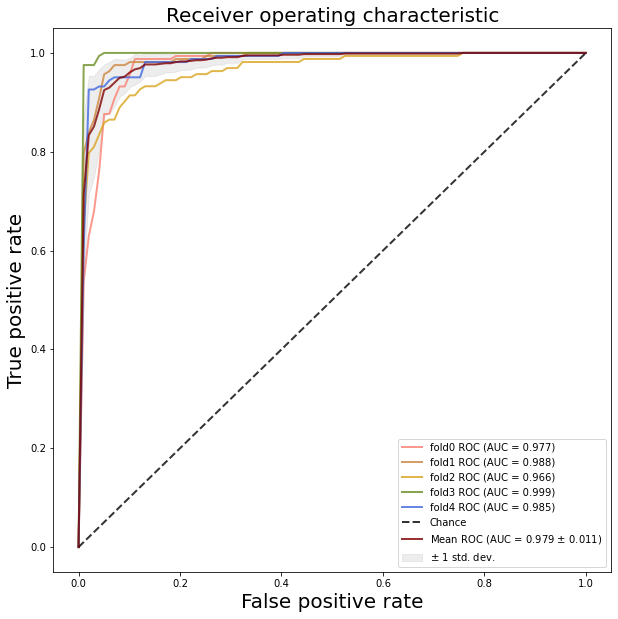

In [8]:
# print(performanceList)

k=5
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
colors = ['salmon', 'peru', 'goldenrod', 'olivedrab', 'royalblue']
# fig=plt.figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(10,10))
# performances = np.ndarray((k,4), dtype=np.float32)
for i in range(k):
    print(i)
#     test_model = load_model(savepath+'/model/residual3_filter4_fold{}_0512.h5'.format(str(i)))
    test_x= np.load(savepath+'/npy/test_x_fold{}.npy'.format(str(i)))
    test_y= np.load(savepath+'/npy/test_y_fold{}.npy'.format(str(i)))
    test_result= np.load(savepath+'/npy/test_result_fold{}.npy'.format(str(i)))
#     np.save(savepath+'/npy/test_result_fold{}.npy'.format(str(i)), test_result)
    fpr_res,tpr_res,_=roc_curve(test_y,test_result)
    auc_res=auc(fpr_res, tpr_res)
    #     print("loss: %.2f, 정확도: %.3f  " %(score[0], score[1]))
    res_tp, res_fp, res_tn, res_fn, res_sensitivity, res_specificity, acc, prec= calculate_performance(test_result, test_y)
    
    performanceList = [auc_res, res_sensitivity, res_specificity, acc]
    for a in range(4):
        performances[i][a] = performanceList[a]
    
#     interp_tpr = np.interp(mean_fpr, _, _)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     np.save('./210512/npy/performanceList_fold{}.npy'.format(str(i)), performances)
    print('###########RESULT########')
    print('AUC:{}, SEN:{}, SPEC:{}, ACC:{}, PREC:{}'.format(round(auc_res,3),round(res_sensitivity,3),round(res_specificity,3),round(acc,3),round(prec,3)))
    print('TP:{}, FP:{}. TN:{}, FN:{}'.format(res_tp, res_fp, res_tn, res_fn))
    print('#########################')
#     i=+1

    interp_tpr = np.interp(mean_fpr, fpr_res,tpr_res)
    interp_tpr[0] = 0.0
    
#     fig, ax = plt.subplots()
    
    ax.plot(mean_fpr, interp_tpr, color=colors[i],
        label=r'fold%s ROC (AUC = %0.3f)' % (str(i),auc_res),
        lw=2, alpha=.8)

    tprs.append(interp_tpr)
    aucs.append(auc_res)
    
# fig, ax = plt.subplots()
# fig = plt.figure(figsize=(10,10))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr_xgb = np.mean(tprs, axis=0)
mean_tpr_xgb[-1] = 1.0
mean_auc_xgb = auc(mean_fpr, mean_tpr_xgb)
std_auc_xgb = np.std(aucs)
ax.plot(mean_fpr, mean_tpr_xgb, color='maroon',
        label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc_xgb, std_auc_xgb),
        lw=2, alpha=.8)

std_tpr_xgb = np.std(tprs, axis=0)
tprs_upper_xgb = np.minimum(mean_tpr_xgb + std_tpr_xgb, 1)
tprs_lower_xgb = np.maximum(mean_tpr_xgb - std_tpr_xgb, 0)
ax.fill_between(mean_fpr, tprs_lower_xgb, tprs_upper_xgb, color='darkgray', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

plt.xlabel('False positive rate',fontsize=20)
plt.ylabel('True positive rate',fontsize=20)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.set_title("Receiver operating characteristic",fontsize=20)
ax.legend(loc="lower right")


plt.show()
fig.savefig(savepath+'/result/{}_cv5_first_{}.jpg'.format(model_type, date), dpi=300)

np.save(savepath+'/result/mean_tpr_{}_{}.npy'.format(model_type, date), mean_tpr_xgb)

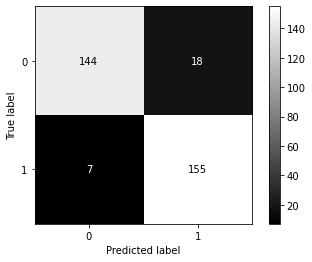

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


confusionMatrix = confusion_matrix(lab_test, predicts)

disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)

disp.plot(cmap='gray')
